In [62]:
# %pip install CoolProp
# %pip install seaborn
# %pip install openpyxl

In [63]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pickle

import DiadFit as pf
pf.__version__


'1.0.1'

In [64]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

In [65]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.getcwd()

# rep_FI_path=os.path.join(Helperfile_folder, "Leilani_repeated_names.xlsx") #r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Helper_files\Leilaini_repeated_names.xlsx"

#Folder to save figures

figpath=MasterFolder +slash+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

#Folder to save full datasets

compilation_folder=MasterFolder +slash+'Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

In [66]:
## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)
def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

In [67]:
kamaehu = compile_Raman_sessions(path=MasterFolder,sheet_name='Sheet1',keyword='Raman')

kamaehu = kamaehu[(~kamaehu['filename'].str.contains('test'))&(kamaehu['Density g/cm3']>0)&~(kamaehu['σ Density g/cm3']>0.04)]

kamaehu['date_object']=pd.to_datetime(kamaehu['date'])

kamaehu=kamaehu.sort_values(by=['date_object', 'filename'])

kamaehu.to_clipboard(excel=True, index=False)

kamaehu.to_excel(compilation_folder+'/'+"Kamae'huakanaloa.xlsx")

kamaehu

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,lower_values,upper_values,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name_x,Model_name_y,SO2_Diad_Ratio,SO2_mol_ratio,date_object
286,L87-1-101-reg1-FIA-r1,0.312759,0.003972,0.003201,0.002351,103.513380,0.007506,0.000394,0.007512,6.006,...,0.997751,0.997758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
287,L87-1-101-reg1-FIA-r2,0.310070,0.003187,0.002151,0.002351,103.507071,0.005049,0.000394,0.005045,6.006,...,0.997749,0.997757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
288,L87-1-101-reg1-FIA-r3,0.306799,0.003183,0.002145,0.002351,103.499388,0.005042,0.000394,0.005038,6.007,...,0.997748,0.997755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
289,L87-1-101-reg1-FIB-r1,0.230628,0.004543,0.003881,0.002361,103.317722,0.009386,0.000394,0.009399,6.001,...,0.997746,0.997754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
290,L87-1-101-reg1-FIB-r2,0.230371,0.004612,0.003962,0.002361,103.317102,0.009581,0.000395,0.009595,6.000,...,0.997745,0.997752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,KA71_c135_a1_FIA,0.407894,0.004368,0.003683,0.002349,103.732048,0.008292,0.000376,0.008301,6.003,...,0.997876,0.997884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-03
690,KA71_c135_a1_FIB,0.489878,0.015256,0.015074,0.002354,103.913182,0.032667,0.000378,0.032735,6.000,...,0.997875,0.997882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-03
691,KA71_c135_a1_FIC,0.298604,0.007536,0.007159,0.002352,103.480096,0.016881,0.000378,0.016913,5.996,...,0.997872,0.997880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-03
692,KA78_c104_a1_FIA,0.432931,0.002921,0.001735,0.002350,103.788094,0.003861,0.000382,0.003850,5.997,...,0.997869,0.997877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-03


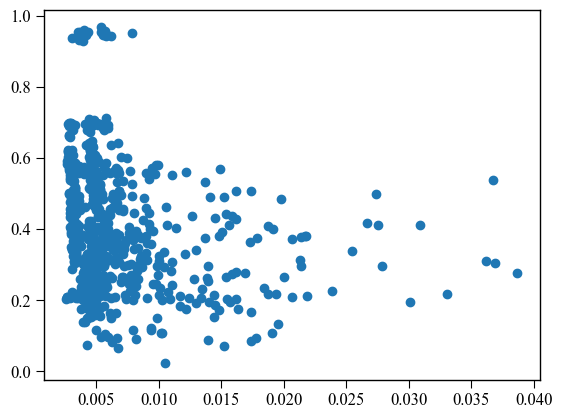

In [68]:

plt.scatter(kamaehu['σ Density g/cm3'],kamaehu['Density g/cm3'])

In [69]:
rep_FI_names=pd.read_excel('Helper_file.xlsx')
kamaehu_reps=pd.merge(kamaehu,rep_FI_names, on='filename')
kamaehu_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,SO2_Diad_Ratio,SO2_mol_ratio,date_object_x,FI_name,Sample-Crystal,Sample,Crystal,Region,FI#,date_object_y
0,L87-1-101-reg1-FIA-r1,0.312759,0.003972,0.003201,0.002351,103.513380,0.007506,0.000394,0.007512,6.006,...,NaN,NaN,2024-01-04,L87-1-101-reg1-FIA,187-1-101,187-1,101,reg1,FIA,2024-01-04
1,L87-1-101-reg1-FIA-r2,0.310070,0.003187,0.002151,0.002351,103.507071,0.005049,0.000394,0.005045,6.006,...,NaN,NaN,2024-01-04,L87-1-101-reg1-FIA,187-1-101,187-1,101,reg1,FIA,2024-01-04
2,L87-1-101-reg1-FIA-r3,0.306799,0.003183,0.002145,0.002351,103.499388,0.005042,0.000394,0.005038,6.007,...,NaN,NaN,2024-01-04,L87-1-101-reg1-FIA,187-1-101,187-1,101,reg1,FIA,2024-01-04
3,L87-1-101-reg1-FIB-r1,0.230628,0.004543,0.003881,0.002361,103.317722,0.009386,0.000394,0.009399,6.001,...,NaN,NaN,2024-01-04,L87-1-101-reg1-FIB,187-1-101,187-1,101,reg1,FIB,2024-01-04
4,L87-1-101-reg1-FIB-r2,0.230371,0.004612,0.003962,0.002361,103.317102,0.009581,0.000395,0.009595,6.000,...,NaN,NaN,2024-01-04,L87-1-101-reg1-FIB,187-1-101,187-1,101,reg1,FIB,2024-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,KA71_c135_a1_FIA,0.407894,0.004368,0.003683,0.002349,103.732048,0.008292,0.000376,0.008301,6.003,...,NaN,NaN,2024-09-03,KA71_c135_a1,187-1-c135,187-1,c135,a1,FIA,2024-09-03
681,KA71_c135_a1_FIB,0.489878,0.015256,0.015074,0.002354,103.913182,0.032667,0.000378,0.032735,6.000,...,NaN,NaN,2024-09-03,KA71_c135_a1,187-1-c135,187-1,c135,a1,FIB,2024-09-03
682,KA71_c135_a1_FIC,0.298604,0.007536,0.007159,0.002352,103.480096,0.016881,0.000378,0.016913,5.996,...,NaN,NaN,2024-09-03,KA71_c135_a1,187-1-c135,187-1,c135,a1,FIC,2024-09-03
683,KA78_c104_a1_FIA,0.432931,0.002921,0.001735,0.002350,103.788094,0.003861,0.000382,0.003850,5.997,...,NaN,NaN,2024-09-03,KA78_c104_a1,187-8-c104,187-8,c104,a1,FIA,2024-09-03


In [70]:
raela_data=pd.read_excel(r"Raela_data.xlsx")
raela_data

grouped = raela_data.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = raela_data.select_dtypes(include='number')
non_numeric_cols = raela_data.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_raela_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_raela_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_raela_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate raela_averageds and reindex columns to the original order
raela_averaged = pd.concat([numeric_raela_averaged_mean, non_numeric_raela_averaged], axis=1)
raela_averaged = raela_averaged.reindex(columns=raela_data.columns)

# Add standard deviation columns after reindexing
raela_averaged = pd.concat([raela_averaged, numeric_raela_averaged_std.add_suffix('_std')], axis=1)

# Reset index to get a DataFrame
raela_averaged = raela_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
raela_averaged = pd.merge(raela_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
raela_averaged['averaged?']=raela_averaged['averaged?'].fillna('No')

raela_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_Raela_averaged.xlsx")
raela_averaged

,Unnamed: 0,filename,FI_name,Sample-Crystal,Sample,Crystal,Region,FI#,Density g/cm3,σ Density g/cm3,...,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,time_std,preferred_values_std,lower_values_std,upper_values_std,Crystal.1_std,averaged?
0,6.0,L11_11_FIA,L11_11_FIA,186-11-11,186-11,11.0,NaN,FIA,0.350766,0.020911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,7.0,L11_11_FIB,L11_11_FIB,186-11-11,186-11,11.0,NaN,FIB,0.346357,0.030440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,8.0,L11_11_FIC,L11_11_FIC,186-11-11,186-11,11.0,NaN,FIC,0.359667,0.028681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,9.0,L11_11_FID,L11_11_FID,186-11-11,186-11,11.0,NaN,FID,0.308908,0.023847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,2.0,L11_13_FIA_20w,L11_13_FIA,186-11-13,186-11,13.0,NaN,FIA,0.026862,0.008875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.5,L79_2_FIA_r2,L79_2_FIA,187-9-2,187-9,2.0,NaN,FIA,0.338391,0.005936,...,NaN,NaN,NaN,NaN,192.333044,0.000004,0.000004,0.000004,0.0,Yes
71,2.0,L79_4_FI,L79_4_FI,187-9-4,187-9,4.0,NaN,FI,0.434546,0.005042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
72,3.0,L79_7_FI,L79_7_FI,187-9-7,187-9,7.0,NaN,FI,0.497181,0.014291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
73,4.0,L79_8_FIA,L79_8_FIA,187-9-8,187-9,8.0,NaN,FIA,0.337821,0.007805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [71]:
grouped = kamaehu_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = kamaehu_reps.select_dtypes(include='number')
non_numeric_cols = kamaehu_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_kamaehu_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_kamaehu_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_kamaehu_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate kamaehu_averageds and reindex columns to the original order
kamaehu_averaged = pd.concat([numeric_kamaehu_averaged_mean, non_numeric_kamaehu_averaged], axis=1)
kamaehu_averaged = kamaehu_averaged.reindex(columns=kamaehu_reps.columns)

# Add standard deviation columns after reindexing
kamaehu_averaged = pd.concat([kamaehu_averaged, numeric_kamaehu_averaged_std.add_suffix('_std')], axis=1)

# Reset index to get a DataFrame
kamaehu_averaged = kamaehu_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
kamaehu_averaged = pd.merge(kamaehu_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
kamaehu_averaged['averaged?'] = kamaehu_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
kamaehu_averaged=kamaehu_averaged[~(kamaehu_averaged['filename'].str.contains("186-9-118-A"))]
kamaehu_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_averaged.xlsx")

kamaehu_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,time_std,preferred_values_std,lower_values_std,upper_values_std,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,SO2_mol_ratio_std,averaged?
0,186-11-101-A-rep1,0.295174,0.008836,0.008506,0.002353,103.471958,0.020074,0.001211,0.020078,11.950667,...,304.944257,2.370268e-06,2.355955e-06,2.384580e-06,NaN,NaN,NaN,NaN,NaN,Yes
1,186-11-101-B-rep1,0.257860,0.006202,0.005664,0.002357,103.383233,0.013582,0.001206,0.013547,11.956667,...,277.265216,2.044903e-06,2.034383e-06,2.055423e-06,NaN,NaN,NaN,NaN,NaN,Yes
2,186-11-101-C-rep1,0.292324,0.004625,0.003982,0.002353,103.465269,0.009412,0.001203,0.009354,11.983000,...,287.970485,2.014189e-06,2.005767e-06,2.022610e-06,NaN,NaN,NaN,NaN,NaN,Yes
3,186-11-101-D-rep1,0.309190,0.036172,0.036096,0.002351,103.505004,0.084739,0.001202,0.084911,12.009000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,186-11-102-A,0.471472,0.004668,0.004032,0.002352,103.873117,0.008815,0.001267,0.008743,6.082000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,L87-1-101-reg2-FIC-r1,0.343428,0.003323,0.002349,0.002349,103.584834,0.005439,0.000398,0.005437,6.018000,...,361.220616,1.376125e-06,1.361966e-06,1.390284e-06,NaN,NaN,NaN,NaN,NaN,Yes
403,L87-1-101-reg3-FIA-r1,0.391411,0.003058,0.001959,0.002348,103.694804,0.004443,0.000414,0.004433,6.029333,...,359.938884,1.107115e-06,1.138179e-06,1.076054e-06,NaN,NaN,NaN,NaN,NaN,Yes
404,L87-1-101-reg3-FIB-r1,0.316046,0.004244,0.003451,0.002351,103.521075,0.008078,0.000426,0.008083,6.042333,...,310.500134,3.936437e-07,4.270383e-07,3.603172e-07,NaN,NaN,NaN,NaN,NaN,Yes
405,L87-1-101-reg3-FIC-r1,0.372505,0.004394,0.003713,0.002348,103.651742,0.008492,0.000440,0.008500,6.046333,...,339.085535,5.011918e-07,4.590764e-07,5.434361e-07,NaN,NaN,NaN,NaN,NaN,Yes


## This imports the FI data which is from MI bearing crystals

In [72]:
relative_path = os.path.join("..", "..","Melt inclusions", "Compiled_data", "Kamae'huakanaloa_averaged.xlsx")
file_path = os.path.normpath(os.path.join(os.getcwd(), relative_path))

kamaehu_MIruns = pd.read_excel(file_path)
kamaehu_MIruns = kamaehu_MIruns.loc[:, ~kamaehu_MIruns.columns.str.contains('^Unnamed')]

kamaehu_MIruns

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,upper_values_std,Peak_Cent_SO2_std,Peak_Area_SO2_std,Peak_Height_SO2_std,SO2_Diad_Ratio_std,SO2_mol_ratio_std,date_object_y_std,averaged?,Error (%),Error (std) (%)
0,186-11-201-MIA-rep1,0.143828,0.006759,0.005516,0.003883,103.113236,0.013920,0.001151,0.013900,12.013250,...,1.948128e-06,NaN,NaN,NaN,NaN,NaN,0.0,Yes,4.699279,5.828516
1,186-11-202-MIA-rep1,0.012467,0.006641,0.005341,0.003944,102.781718,0.013480,0.001141,0.013459,12.014000,...,4.726579e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes,53.270017,17.296062
2,186-11-203-MIA-rep1,0.018748,0.007723,0.006630,0.003922,102.797570,0.016731,0.001158,0.016725,12.018000,...,1.161651e-06,NaN,NaN,NaN,NaN,NaN,0.0,Yes,41.193773,39.988524
3,186-11-203-MIB-rep1,0.011673,0.007474,0.006340,0.003948,102.779715,0.016001,0.001176,0.015991,12.047333,...,1.541814e-06,NaN,NaN,NaN,NaN,NaN,0.0,Yes,64.027745,66.386261
4,186-11-204-MIA-rep1,0.123203,0.005056,0.003282,0.003833,103.061186,0.008284,0.001236,0.008207,11.943333,...,9.042040e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes,4.103747,0.724682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,1.559597e-05,NaN,NaN,NaN,NaN,NaN,0.0,Yes,0.618742,0.828182
134,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,1.559597e-05,NaN,NaN,NaN,NaN,NaN,0.0,Yes,0.618742,0.828182
135,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,1.559597e-05,NaN,NaN,NaN,NaN,NaN,0.0,Yes,0.618742,0.828182
136,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,3.000127e-07,NaN,NaN,NaN,NaN,NaN,0.0,Yes,0.424068,0.743583


## Now we merge all data 

In [73]:
kamaehu_averaged_CDonly=kamaehu_averaged.copy()

kamaehu_averaged=pd.concat([kamaehu_averaged_CDonly,raela_averaged,kamaehu_MIruns],axis=0,ignore_index=True)
kamaehu_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_averaged_ALL.xlsx")
kamaehu_averaged

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,FI,Crystal.1,FI#.1,Unnamed: 0_std,Crystal_std,Region_std,Crystal.1_std,date_object_y_std,Error (%),Error (std) (%)
0,186-11-101-A-rep1,0.295174,0.008836,0.008506,0.002353,103.471958,0.020074,0.001211,0.020078,11.950667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186-11-101-B-rep1,0.257860,0.006202,0.005664,0.002357,103.383233,0.013582,0.001206,0.013547,11.956667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,186-11-101-C-rep1,0.292324,0.004625,0.003982,0.002353,103.465269,0.009412,0.001203,0.009354,11.983000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,186-11-101-D-rep1,0.309190,0.036172,0.036096,0.002351,103.505004,0.084739,0.001202,0.084911,12.009000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,186-11-102-A,0.471472,0.004668,0.004032,0.002352,103.873117,0.008815,0.001267,0.008743,6.082000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.618742,0.828182
616,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.618742,0.828182
617,FG04-A1-4-start,0.694860,0.004299,0.003461,0.002392,104.335852,0.006782,0.001030,0.006699,6.032333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.618742,0.828182
618,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.424068,0.743583


# now merge the EDS data in

In [74]:
eds_merge_names=pd.read_excel(r"Helper_file.xlsx",sheet_name="EDS_merge")

kam_w_EDSnames=pd.merge(left=kamaehu_averaged,left_on='filename',right=eds_merge_names,right_on='filename')

EDS_data=pd.read_excel(r"EDS_KAM.xlsx")

EDS_data.drop("Unnamed: 0", axis=1, inplace=True)

kam_w_EDS=pd.merge(left=kam_w_EDSnames,left_on='EDS_name',right=EDS_data,right_on='Sample Name',how='left')
kam_w_EDS

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Line_Si,Line_Ca,Line_Mn,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,SampleID,Fo
0,186-11-101-A-rep1,0.295174,0.008836,0.008506,0.002353,103.471958,0.020074,0.001211,0.020078,11.950667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,186-11-101-B-rep1,0.257860,0.006202,0.005664,0.002357,103.383233,0.013582,0.001206,0.013547,11.956667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,186-11-101-C-rep1,0.292324,0.004625,0.003982,0.002353,103.465269,0.009412,0.001203,0.009354,11.983000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,186-11-101-D-rep1,0.309190,0.036172,0.036096,0.002351,103.505004,0.084739,0.001202,0.084911,12.009000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,186-11-102-A,0.471472,0.004668,0.004032,0.002352,103.873117,0.008815,0.001267,0.008743,6.082000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,187-1-212-MI2-rep1,0.247123,0.005452,0.004914,0.002358,103.357462,0.011814,0.000871,0.011807,6.003333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,187-1-212-MI3-rep1,0.239540,0.003895,0.003069,0.002360,103.339231,0.007401,0.000873,0.007362,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,FG04-A1-4-middle-rep4,0.691419,0.002991,0.001798,0.002391,104.329121,0.003527,0.000829,0.003436,6.026000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate SO2 mol fraction

In [75]:
kam_w_EDS['SO2 mol%']=pf.calculate_mole_fraction_2comp(peak_area_a=kam_w_EDS['Peak_Area_SO2'], peak_area_b=kam_w_EDS['Diad1_Voigt_Area']+kam_w_EDS['Diad2_Voigt_Area'],
                                  cross_section_a=5.3, cross_section_b=1.4+0.89, instrument_eff_a=1, instrument_eff_b=1)['% A']



## Now let's calculate a first temperature from Fo content.

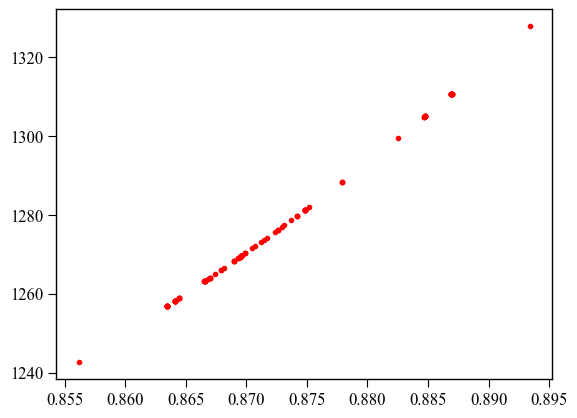

In [76]:
## For now, use the model for Kilauea, I will calculate a new one for Kam later. Need to compile data to do it

with open('TempFoModel.pkl', 'rb') as f:
    Pf_TempFo = pickle.load(f)


kam_w_EDS['Temp_from_Fo_all']=Pf_TempFo(kam_w_EDS['Fo'])
MeanT=np.nanmean(kam_w_EDS['Temp_from_Fo_all'])
kam_w_EDS['Temp_from_Fo_all'] = kam_w_EDS['Temp_from_Fo_all'].fillna(MeanT)

# Create 'Temp_error' column based on whether 'Temp_from_Fo' is a number
kam_w_EDS['Temp_error'] = np.where(kam_w_EDS['Temp_from_Fo_all'] == MeanT, 100, 50)

kam_w_EDS.to_clipboard(excel=True)

plt.plot(kam_w_EDS['Fo'], kam_w_EDS['Temp_from_Fo_all'], '.r')


In [77]:
kam_w_EDS

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,SampleID,Fo,SO2 mol%,Temp_from_Fo_all,Temp_error
0,186-11-101-A-rep1,0.295174,0.008836,0.008506,0.002353,103.471958,0.020074,0.001211,0.020078,11.950667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
1,186-11-101-B-rep1,0.257860,0.006202,0.005664,0.002357,103.383233,0.013582,0.001206,0.013547,11.956667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
2,186-11-101-C-rep1,0.292324,0.004625,0.003982,0.002353,103.465269,0.009412,0.001203,0.009354,11.983000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
3,186-11-101-D-rep1,0.309190,0.036172,0.036096,0.002351,103.505004,0.084739,0.001202,0.084911,12.009000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
4,186-11-102-A,0.471472,0.004668,0.004032,0.002352,103.873117,0.008815,0.001267,0.008743,6.082000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,187-1-212-MI2-rep1,0.247123,0.005452,0.004914,0.002358,103.357462,0.011814,0.000871,0.011807,6.003333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
408,187-1-212-MI3-rep1,0.239540,0.003895,0.003069,0.002360,103.339231,0.007401,0.000873,0.007362,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
409,FG04-A1-4-middle-rep4,0.691419,0.002991,0.001798,0.002391,104.329121,0.003527,0.000829,0.003436,6.026000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100
410,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100


# Now calculate pure CO2 pressure as starting point

In [78]:
P_SW96=pf.calculate_P_for_rho_T(CO2_dens_gcm3=kam_w_EDS['Density g/cm3'], 
                                T_K=kam_w_EDS['Temp_from_Fo_all']+273.15, EOS='SW96')
P_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,1.094060,109.405985,1550.515672,0.295174
1,0.922884,92.288387,1550.515672,0.257860
2,1.080536,108.053619,1550.515672,0.292324
3,1.161736,116.173555,1550.515672,0.309190
4,2.110952,211.095161,1550.515672,0.471472


## Now let's calculate XH2O from the Schipper polynomial

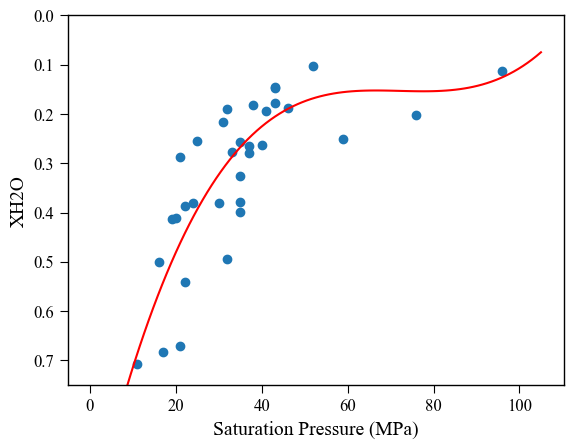

In [79]:
schipperMI=pd.read_excel(r"kamaehu_MI_Schipper11.xlsx")
schipperMI.head()

P_MI_MPa=schipperMI["SaturationP_bars_VESIcal"]/10
plt.scatter(P_MI_MPa,schipperMI["XH2O_fl_VESIcal"])
plt.ylim([0.75,0])
plt.xlabel("Saturation Pressure (MPa)")
plt.ylabel("XH2O")

filt=~(P_MI_MPa.between(55,70))
x=P_MI_MPa[filt]
y=schipperMI["XH2O_fl_VESIcal"][filt]
Pf = np.poly1d(np.polyfit(x, y,
                          3))
Px = np.linspace(0, 105, 101)
Py = Pf(Px)
plt.plot(Px, Py, '-r',label='Measured H$_2$O')

import pickle

with open('XH2O_fromschipperMI_Kam.pkl', 'wb') as f:
    pickle.dump(Pf, f)

In [80]:
with open('XH2O_fromschipperMI_Kam.pkl', 'rb') as f:
    Pf_xh2o = pickle.load(f)

XH2O_av=Pf_xh2o(P_SW96['P_MPa'])
XH2O_av[XH2O_av<0]=0.02

kam_w_EDS['XH2O']=XH2O_av
kam_w_EDS['XH2O']=kam_w_EDS['XH2O'].fillna(0)
kam_w_EDS

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Line_Ni,Line_Al,Line_Ti,Line_Cr,SampleID,Fo,SO2 mol%,Temp_from_Fo_all,Temp_error,XH2O
0,186-11-101-A-rep1,0.295174,0.008836,0.008506,0.002353,103.471958,0.020074,0.001211,0.020078,11.950667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.036440
1,186-11-101-B-rep1,0.257860,0.006202,0.005664,0.002357,103.383233,0.013582,0.001206,0.013547,11.956667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.137657
2,186-11-101-C-rep1,0.292324,0.004625,0.003982,0.002353,103.465269,0.009412,0.001203,0.009354,11.983000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.049220
3,186-11-101-D-rep1,0.309190,0.036172,0.036096,0.002351,103.505004,0.084739,0.001202,0.084911,12.009000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.020000
4,186-11-102-A,0.471472,0.004668,0.004032,0.002352,103.873117,0.008815,0.001267,0.008743,6.082000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,187-1-212-MI2-rep1,0.247123,0.005452,0.004914,0.002358,103.357462,0.011814,0.000871,0.011807,6.003333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.147475
408,187-1-212-MI3-rep1,0.239540,0.003895,0.003069,0.002360,103.339231,0.007401,0.000873,0.007362,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.151301
409,FG04-A1-4-middle-rep4,0.691419,0.002991,0.001798,0.002391,104.329121,0.003527,0.000829,0.003436,6.026000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.020000
410,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1277.365672,100,0.020000


# And now calculate P using the XH2O estimated

In [81]:
P_DZ06=pf.calculate_entrapment_P_XH2O(XH2O=kam_w_EDS['XH2O'], CO2_dens_gcm3=kam_w_EDS['Density g/cm3'],
                 T_K=kam_w_EDS['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

## One more iteration, just to make sure it doesn't change 

XH2O_av2=Pf_xh2o(100*P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av2[XH2O_av2<0]=0
kam_w_EDS['XH2O']=XH2O_av2
kam_w_EDS['XH2O']=kam_w_EDS['XH2O'].fillna(0)

P_DZ062=pf.calculate_entrapment_P_XH2O(XH2O=kam_w_EDS['XH2O'], CO2_dens_gcm3=kam_w_EDS['Density g/cm3'],
                 T_K=kam_w_EDS['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

# Now propagate uncertainty

In [82]:
## Duan and Zhang Error propagate. 
MC_Av_rho_T_CDH, MC_All_rho_T_CDH, fig=pf.propagate_FI_uncertainty(
T_K=kam_w_EDS['Temp_from_Fo_all']+273.15,error_T_K=kam_w_EDS['Temp_error'], error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=kam_w_EDS['Density g/cm3'],error_CO2_dens=kam_w_EDS['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=kam_w_EDS['XH2O'], error_XH2O=0.05, error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=kam_w_EDS['filename'],
model='three-step',d1=1,rho1=1017,d2=7,rho2=2750, rho3=3200,error_crust_dens=5, error_type_crust_dens='Perc', error_dist_crust_dens='normal', 
N_dup=500, fig_i=0, plot_figure=False)

MC_Av_rho_T_CDH.head()

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,186-11-101-A-rep1,0.0,0.295174,4.672355,1.090477,1.123303,1.113788,0.096826,0.093214,4.794032,...,1550.515672,100.0,0.295174,0.008836,None,5.0,three-step,DZ06,0.000000,0.05
1,186-11-101-B-rep1,1.0,0.257860,4.304826,0.991327,1.004178,0.996563,0.092853,0.091013,4.352460,...,1550.515672,100.0,0.257860,0.006202,None,5.0,three-step,DZ06,0.065412,0.05
2,186-11-101-C-rep1,2.0,0.292324,4.622498,1.077027,1.108460,1.096808,0.089012,0.087275,4.739012,...,1550.515672,100.0,0.292324,0.004625,None,5.0,three-step,DZ06,0.000000,0.05
3,186-11-101-D-rep1,3.0,0.309190,4.921823,1.157778,1.203597,1.184373,0.202351,0.194268,5.090809,...,1550.515672,100.0,0.309190,0.036172,None,5.0,three-step,DZ06,0.000000,0.05
4,186-11-102-A,4.0,0.471472,8.281891,2.120829,2.181860,2.160921,0.177248,0.169847,8.476308,...,1550.515672,100.0,0.471472,0.004668,None,5.0,three-step,DZ06,0.000000,0.05


## Merge into main dataframe

In [83]:
kamaehu_PMC=pd.merge(left=kam_w_EDS,right=MC_Av_rho_T_CDH, left_on='filename',right_on='Filename')
kamaehu_PMC

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,186-11-101-A-rep1,0.295174,0.008836,0.008506,0.002353,103.471958,0.020074,0.001211,0.020078,11.950667,...,1550.515672,100.0,0.295174,0.008836,None,5.0,three-step,DZ06,0.000000,0.05
1,186-11-101-B-rep1,0.257860,0.006202,0.005664,0.002357,103.383233,0.013582,0.001206,0.013547,11.956667,...,1550.515672,100.0,0.257860,0.006202,None,5.0,three-step,DZ06,0.065412,0.05
2,186-11-101-C-rep1,0.292324,0.004625,0.003982,0.002353,103.465269,0.009412,0.001203,0.009354,11.983000,...,1550.515672,100.0,0.292324,0.004625,None,5.0,three-step,DZ06,0.000000,0.05
3,186-11-101-D-rep1,0.309190,0.036172,0.036096,0.002351,103.505004,0.084739,0.001202,0.084911,12.009000,...,1550.515672,100.0,0.309190,0.036172,None,5.0,three-step,DZ06,0.000000,0.05
4,186-11-102-A,0.471472,0.004668,0.004032,0.002352,103.873117,0.008815,0.001267,0.008743,6.082000,...,1550.515672,100.0,0.471472,0.004668,None,5.0,three-step,DZ06,0.000000,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,187-1-212-MI2-rep1,0.247123,0.005452,0.004914,0.002358,103.357462,0.011814,0.000871,0.011807,6.003333,...,1550.515672,100.0,0.247123,0.005452,None,5.0,three-step,DZ06,0.096556,0.05
408,187-1-212-MI3-rep1,0.239540,0.003895,0.003069,0.002360,103.339231,0.007401,0.000873,0.007362,6.003667,...,1550.515672,100.0,0.239540,0.003895,None,5.0,three-step,DZ06,0.115171,0.05
409,FG04-A1-4-middle-rep4,0.691419,0.002991,0.001798,0.002391,104.329121,0.003527,0.000829,0.003436,6.026000,...,1550.515672,100.0,0.691419,0.002991,None,5.0,three-step,DZ06,0.000000,0.05
410,FG19-101-A-50X-rep4,0.953458,0.004043,0.003715,0.001593,105.016439,0.012030,0.000888,0.012022,6.003667,...,1550.515672,100.0,0.953458,0.004043,None,5.0,three-step,DZ06,0.000000,0.05


## Now calculate Depth considering the water (no error propagation, like a 4 step model)

In [84]:
kamaehu_PMC['P_MPa_minus10']=kamaehu_PMC['SingleCalc_P_kbar']*100-10
kamaehu_PMC['Depth_km_4step']=pf.convert_pressure_to_depth(P_kbar=kamaehu_PMC['P_MPa_minus10']/100,model='three-step',d1=7,rho1=2650,d2=11,rho2=2900,rho3=3200)+1


## Read in EQ catalog USGS

In [85]:
from datetime import datetime

date_time_str = "2023-12-15T03:51:02.430Z"
date_time_obj = datetime.strptime(date_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")

eqs=pd.read_csv("query.csv")

eqs['time'] = pd.to_datetime(eqs['time'], format="%Y-%m-%dT%H:%M:%S.%fZ")

eqs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-04-02 18:51:37.600,19.051000,-155.364000,33.540,2.76,ml,42.0,209.0,0.1393,0.12,...,2024-04-07T18:19:23.040Z,"20 km SE of Pāhala, Hawaii",earthquake,0.50,0.75,0.088375,9.0,reviewed,hv,hv
1,2024-02-23 00:35:31.260,18.846333,-155.210000,10.780,3.27,ml,48.0,259.0,0.3891,0.13,...,2024-02-24T14:31:16.655Z,"46 km ESE of Naalehu, Hawaii",earthquake,0.51,0.68,0.187883,30.0,reviewed,hv,hv
2,2024-02-22 22:19:44.820,18.840667,-155.201333,9.710,3.04,ml,48.0,260.0,0.3986,0.14,...,2024-03-01T04:27:54.040Z,"47 km ESE of Naalehu, Hawaii",earthquake,0.59,0.60,0.153374,16.0,reviewed,hv,hv
3,2024-02-07 00:39:04.320,18.993333,-155.307667,8.310,2.57,ml,40.0,271.0,0.2176,0.22,...,2024-04-20T19:33:36.040Z,"29 km SE of Pāhala, Hawaii",earthquake,0.55,0.56,0.205284,16.0,reviewed,hv,hv
4,2024-02-05 12:28:25.520,18.865833,-155.206497,4.730,2.52,md,16.0,293.0,0.3761,0.15,...,2024-04-20T19:33:01.040Z,"45 km ESE of Naalehu, Hawaii",earthquake,0.90,1.25,0.190000,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1962-03-21 22:26:52.880,18.957667,-155.379833,2.533,2.85,ml,6.0,261.0,NaN,0.14,...,2020-03-31T18:31:05.600Z,"24 km ESE of Naalehu, Hawaii",earthquake,2.19,1.84,0.120000,4.0,reviewed,hv,hv
1543,1961-04-12 23:52:30.960,18.907000,-155.245667,8.389,3.53,ml,7.0,286.0,NaN,0.06,...,2020-03-31T18:51:09.100Z,"39 km ESE of Naalehu, Hawaii",earthquake,1.91,1.17,0.100000,2.0,reviewed,hv,hv
1544,1961-01-08 01:50:22.600,18.811667,-155.166500,5.911,3.32,ml,5.0,348.0,NaN,0.08,...,2020-03-31T18:30:53.010Z,"51 km ESE of Naalehu, Hawaii",earthquake,8.36,10.86,NaN,1.0,reviewed,hv,hv
1545,1960-07-16 03:41:24.910,18.739667,-155.104500,5.901,3.46,ml,6.0,325.0,NaN,0.08,...,2020-03-31T17:07:31.590Z,"61 km SE of Naalehu, Hawaii",earthquake,8.18,10.59,0.220000,4.0,reviewed,hv,hv


## Remove P and D calcs from MI rows, and D calcs from standards

In [86]:
columns_to_replace = [
    "Temp_from_Fo_all", "Temp_error", "XH2O", "Filename", "i", "CO2_density_input",
    "SingleCalc_D_km", "SingleCalc_P_kbar", "Mean_MC_P_kbar", "Med_MC_P_kbar", 
    "std_dev_MC_P_kbar", "std_dev_MC_P_kbar_from_percentile", "Mean_MC_D_km", 
    "Med_MC_D_km", "std_dev_MC_D_km", "std_dev_MC_D_km_from_percentile", 
    "T_K_input", "error_T_K", "CO2_dens_gcm3_input", "error_CO2_dens_gcm3", 
    "crust_dens_kgm3_input", "error_crust_dens_kgm3", "model", "EOS", 
    "XH2O_input", "error_XH2O", "P_MPa_minus10", "Depth_km_4step"
]

kamaehu_PMC.loc[kamaehu_PMC['filename'].str.contains('MI|FG|FO', na=False), columns_to_replace] = np.nan

kamaehu_PMC.to_clipboard(excel=True)

## Mean by crystal. 

In [61]:
grouped = kamaehu_PMC.groupby('Sample-Crystal')

# Separate numeric and non-numeric columns
numeric_cols = kamaehu_PMC.select_dtypes(include='number')
non_numeric_cols = kamaehu_PMC.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_kamaehu_xtal_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_kamaehu_xtal_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_kamaehu_xtal_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate kamaehu_xtal_averageds and reindex columns to the original order
kamaehu_xtal_averaged = pd.concat([numeric_kamaehu_xtal_averaged_mean, non_numeric_kamaehu_xtal_averaged], axis=1)
kamaehu_xtal_averaged = kamaehu_xtal_averaged.reindex(columns=kamaehu_PMC.columns)

# Add standard deviation columns after reindexing
kamaehu_xtal_averaged = pd.concat([kamaehu_xtal_averaged, numeric_kamaehu_xtal_averaged_std.add_suffix('_std')], axis=1)

# Reset index to get a DataFrame
kamaehu_xtal_averaged = kamaehu_xtal_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
kamaehu_xtal_averaged = pd.merge(kamaehu_xtal_averaged, row_counts[['FI_namSample-Crystal', 'averaged?']], on='Sample-Crystal', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
kamaehu_xtal_averaged['averaged?'] = kamaehu_xtal_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
kamaehu_xtal_averaged=kamaehu_xtal_averaged[~(kamaehu_xtal_averaged['filename'].str.contains("186-9-118-A"))]
kamaehu_xtal_averaged.to_excel(compilation_folder+'/'+"Kamae'huakanaloa_xtal_averaged.xlsx")

kamaehu_xtal_averaged


KeyError: "['FI_namSample-Crystal'] not in index"

# Filter the data to ignore MI and standards

In [141]:
filtered_data = kamaehu_PMC[~kamaehu_PMC['filename'].str.contains('FG|MI|FO')]

## Create sample filters
alkbas = filtered_data['filename'].str.contains('187-1|L1')
trans = filtered_data['filename'].str.contains('186-9|L69')
alk = filtered_data['filename'].str.contains('186-11|L11')
thol_1 = filtered_data['filename'].str.contains('187-8')
thol = filtered_data['filename'].str.contains('187-9|L79')

## Pressure histograms

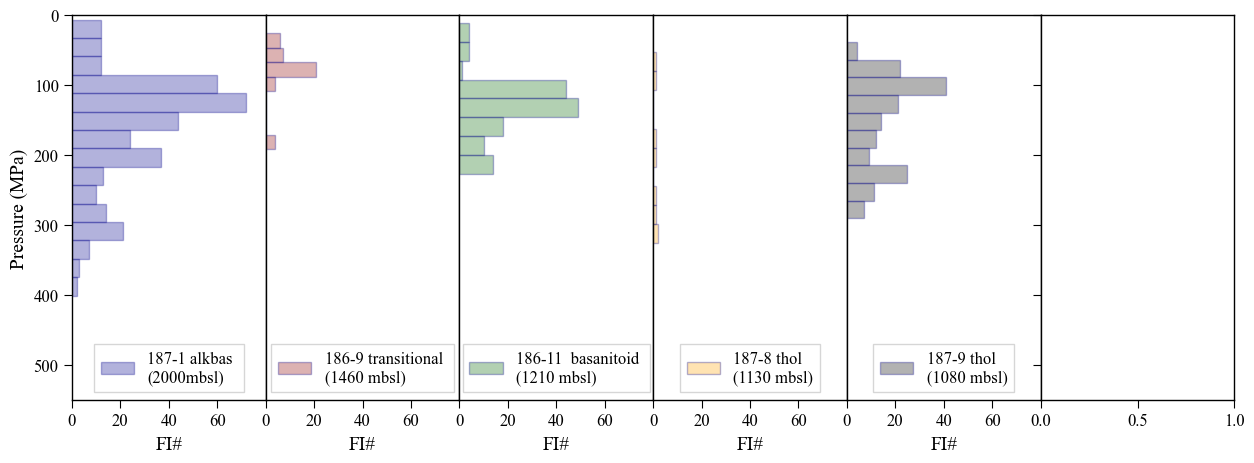

In [157]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15, 5), sharey=True)

# Plotting histograms
ax1.hist(filtered_data['SingleCalc_P_kbar'][alkbas]*100, ec='darkblue', fc='darkblue', bins=15, alpha=0.3, label='187-1 alkbas \n(2000mbsl)', orientation='horizontal')
ax1.legend(loc='lower center')
ax1.set_xlabel('FI#')
ax1.set_ylabel('Pressure (MPa)')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis
ax1.set_ylim([550, 0])  # Set y-axis limits

ax2.hist(filtered_data['SingleCalc_P_kbar'][trans]*100, ec='darkblue', fc='darkred', bins=8, alpha=0.3, label='186-9 transitional \n(1460 mbsl)', orientation='horizontal')
ax2.legend(loc='lower center')
ax2.set_xlabel('FI#')
ax2.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax2.set_ylim([550, 0])  # Set y-axis limits

ax3.hist(filtered_data['SingleCalc_P_kbar'][alk]*100, ec='darkblue', fc='darkgreen', bins=8, alpha=0.3, label='186-11  basanitoid \n(1210 mbsl)', orientation='horizontal')
ax3.legend(loc='lower center')
ax3.set_xlabel('FI#')
ax3.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax3.set_ylim([550, 0])  # Set y-axis limits

ax4.hist(filtered_data['SingleCalc_P_kbar'][thol_1]*100, ec='darkblue', fc='orange', bins=10, alpha=0.3, label='187-8 thol \n(1130 mbsl)', orientation='horizontal')
ax4.legend(loc='lower center')
ax4.set_xlabel('FI#')
ax4.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax4.set_ylim([550, 0])  # Set y-axis limits

ax5.hist(filtered_data['SingleCalc_P_kbar'][thol]*100, ec='darkblue', fc='k', bins=10, alpha=0.3, label='187-9 thol \n(1080 mbsl)', orientation='horizontal')
ax5.legend(loc='lower center')
ax5.set_xlabel('FI#')
ax5.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax5.set_ylim([550, 0])  # Set y-axis limits

plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots
for ax in (ax1, ax2, ax3, ax4, ax5):
    max_limit = 80  # Get the current max limit
    if max_limit == 0:
        continue  # Skip if max limit is 0 to avoid division by zero
    
    # Calculate tick spacing based on max limit
    tick_spacing = max_limit / 4
    
    # Generate ticks
    ticks = np.arange(0, max_limit, tick_spacing)
    
    # Exclude the last tick if it equals the max limit
    if ticks[-1] == max_limit:
        ticks = ticks[:-1]
    
    ax.set_xlim([0, max_limit])  # Set the x-axis limits
    ax.set_xticks(ticks)  # Set the ticks for the x-axis

# plt.tight_layout()
fig.savefig(figpath+slash+'editable_figure_P.pdf', format='pdf', dpi=300, transparent=True)

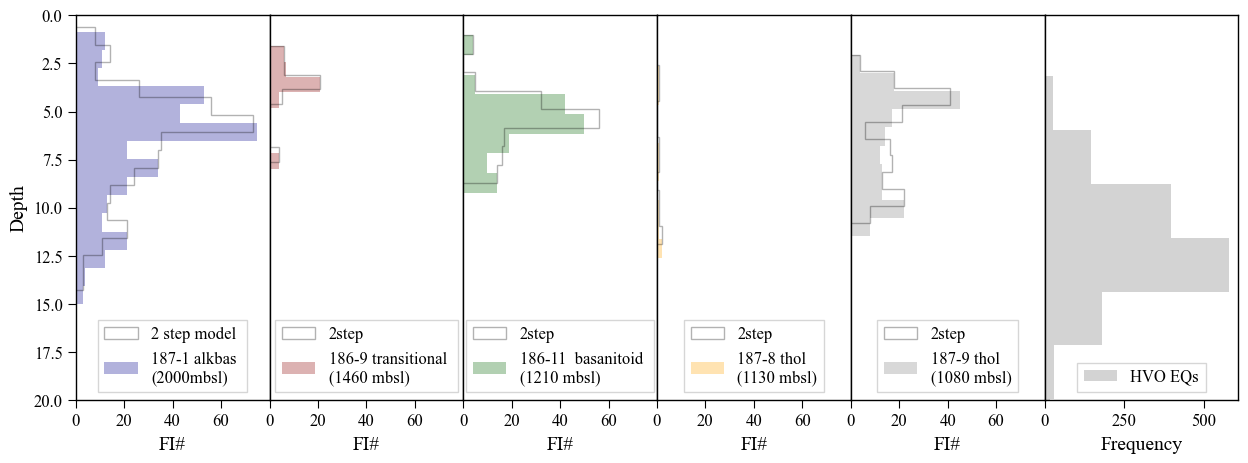

In [158]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' and 'eqs' are defined appropriately
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15, 5), sharey=True)



# Plotting histograms
ax1.hist(filtered_data['SingleCalc_D_km'][alkbas], ec='k', histtype='step', bins=15, alpha=0.3, label='2 step model', orientation='horizontal')
ax1.hist(filtered_data['Depth_km_4step'][alkbas], ec='none', fc='darkblue', bins=15, alpha=0.3, label='187-1 alkbas \n(2000mbsl)', orientation='horizontal')
ax1.legend(loc='lower center')
ax1.set_xlabel('FI#')
ax1.set_ylabel('Depth')  # Set y-axis label only on the first subplot
ax1.tick_params(left=True, labelleft=True)  # Ensure ticks and labels are shown on the left axis
ax1.set_ylim([20, 0])  # Set y-axis limits

ax2.hist(filtered_data['SingleCalc_D_km'][trans], ec='k', histtype='step', bins=8, alpha=0.3, label='2step', orientation='horizontal')
ax2.hist(filtered_data[['Depth_km_4step']][trans], ec='none', fc='darkred', bins=8, alpha=0.3, label='186-9 transitional \n(1460 mbsl)', orientation='horizontal')
ax2.legend(loc='lower center')
ax2.set_xlabel('FI#')
ax2.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax2.set_ylim([20, 0])  # Set y-axis limits

ax3.hist(filtered_data['SingleCalc_D_km'][alk], ec='k', histtype='step', bins=8, alpha=0.3, label='2step', orientation='horizontal')
ax3.hist(filtered_data['Depth_km_4step'][alk], ec='none', fc='darkgreen', bins=8, alpha=0.3, label='186-11  basanitoid \n(1210 mbsl)', orientation='horizontal')
ax3.legend(loc='lower center')
ax3.set_xlabel('FI#')
ax3.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax3.set_ylim([20, 0])  # Set y-axis limits

ax4.hist(filtered_data['SingleCalc_D_km'][thol_1], ec='k', histtype='step', bins=10, alpha=0.3, label='2step', orientation='horizontal')
ax4.hist(filtered_data['Depth_km_4step'][thol_1], ec='none', fc='orange', bins=10, alpha=0.3, label='187-8 thol \n(1130 mbsl)', orientation='horizontal')
ax4.legend(loc='lower center')
ax4.set_xlabel('FI#')
ax4.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax4.set_ylim([20, 0])  # Set y-axis limits

ax5.hist(filtered_data['SingleCalc_D_km'][thol], histtype='step', edgecolor='black', bins=10, alpha=0.3, label='2step', orientation='horizontal')
ax5.hist(filtered_data['Depth_km_4step'][thol], ec='none', fc='grey', bins=10, alpha=0.3, label='187-9 thol \n(1080 mbsl)', orientation='horizontal')
ax5.legend(loc='lower center')
ax5.set_xlabel('FI#')
ax5.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax5.set_ylim([20, 0])  # Set y-axis limits


for ax in (ax1, ax2, ax3, ax4, ax5):
    max_limit = 80  # Get the current max limit
    if max_limit == 0:
        continue  # Skip if max limit is 0 to avoid division by zero
    
    # Calculate tick spacing based on max limit
    tick_spacing = max_limit / 4
    
    # Generate ticks
    ticks = np.arange(0, max_limit, tick_spacing)
    
    # Exclude the last tick if it equals the max limit
    if ticks[-1] == max_limit:
        ticks = ticks[:-1]
    
    ax.set_xlim([0, max_limit])  # Set the x-axis limits
    ax.set_xticks(ticks)  # Set the ticks for the x-axis


ax6.hist(eqs['depth'], ec='none', fc='lightgrey', bins=20, label='HVO EQs', orientation='horizontal')
ax6.set_xlabel('Frequency')
ax6.legend(loc='lower center')
ax6.yaxis.set_tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
ax6.set_ylim([20, 0])  # Set y-axis limits

plt.subplots_adjust(wspace=0)  # Adjust horizontal space between subplots

# plt.tight_layout()
fig.savefig(figpath+slash+'editable_figure.pdf', format='pdf', dpi=300, transparent=True)


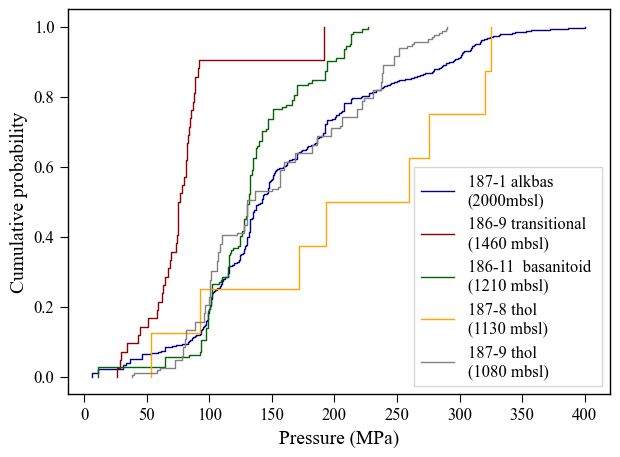

In [159]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))

x1=100*filtered_data['SingleCalc_P_kbar'][alkbas]
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='darkblue', linewidth=1, label='187-1 alkbas \n(2000mbsl)')

x2=100*filtered_data['SingleCalc_P_kbar'][trans]
x2_sorted=np.sort(x2)
ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
         np.arange(x2_sorted.size+1)/x2_sorted.size, color='darkred', linewidth=1, label='186-9 transitional \n(1460 mbsl)')

x3=100*filtered_data['SingleCalc_P_kbar'][alk]
x3_sorted=np.sort(x3)
ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
         np.arange(x3_sorted.size+1)/x3_sorted.size, color='darkgreen', linewidth=1, label='186-11  basanitoid \n(1210 mbsl)')

x4=100*filtered_data['SingleCalc_P_kbar'][thol_1]
x4_sorted=np.sort(x4)
ax1.step(np.concatenate([x4_sorted, x4_sorted[[-1]]]),
         np.arange(x4_sorted.size+1)/x4_sorted.size, color='orange', linewidth=1, label='187-8 thol \n(1130 mbsl)')

x5=100*filtered_data['SingleCalc_P_kbar'][thol]
x5_sorted=np.sort(x5)
ax1.step(np.concatenate([x5_sorted, x5_sorted[[-1]]]),
         np.arange(x5_sorted.size+1)/x5_sorted.size, color='grey', linewidth=1, label='187-9 thol \n(1080 mbsl)')


plt.legend()
ax1.set_xlabel("Pressure (MPa)")
ax1.set_ylabel("Cumulative probability")
# plt.tight_layout()
fig.savefig(figpath+slash+'cdf_samples.pdf', format='pdf', dpi=300, transparent=True)

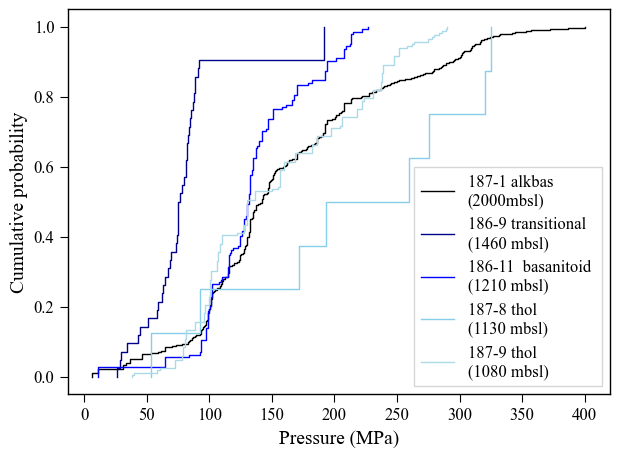

In [160]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))

x1=100*filtered_data['SingleCalc_P_kbar'][alkbas]
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='k', linewidth=1, label='187-1 alkbas \n(2000mbsl)')

x2=100*filtered_data['SingleCalc_P_kbar'][trans]
x2_sorted=np.sort(x2)
ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
         np.arange(x2_sorted.size+1)/x2_sorted.size, color='darkblue', linewidth=1, label='186-9 transitional \n(1460 mbsl)')

x3=100*filtered_data['SingleCalc_P_kbar'][alk]
x3_sorted=np.sort(x3)
ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
         np.arange(x3_sorted.size+1)/x3_sorted.size, color='blue', linewidth=1, label='186-11  basanitoid \n(1210 mbsl)')

x4=100*filtered_data['SingleCalc_P_kbar'][thol_1]
x4_sorted=np.sort(x4)
ax1.step(np.concatenate([x4_sorted, x4_sorted[[-1]]]),
         np.arange(x4_sorted.size+1)/x4_sorted.size, color='skyblue', linewidth=1, label='187-8 thol \n(1130 mbsl)')

x5=100*filtered_data['SingleCalc_P_kbar'][thol]
x5_sorted=np.sort(x5)
ax1.step(np.concatenate([x5_sorted, x5_sorted[[-1]]]),
         np.arange(x5_sorted.size+1)/x5_sorted.size, color='lightblue', linewidth=1, label='187-9 thol \n(1080 mbsl)')


plt.legend()
ax1.set_xlabel("Pressure (MPa)")
ax1.set_ylabel("Cumulative probability")
# plt.tight_layout()
fig.savefig(figpath+slash+'cdf_bluescale.pdf', format='pdf', dpi=300, transparent=True)

## Now plot Depth vs Fo

In [150]:
filtered_data.to_clipboard(excel=True)

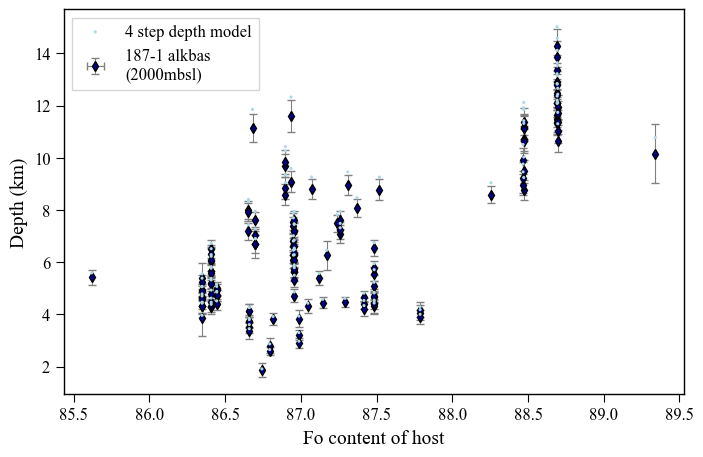

In [151]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))


ax1.errorbar(filtered_data['Fo'][alkbas]*100, filtered_data['SingleCalc_D_km'][alkbas], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][alkbas],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkblue', ms=5, mec='k', capsize=3, label='187-1 alkbas \n(2000mbsl)',zorder=0)
ax1.scatter(filtered_data['Fo'][alkbas]*100, filtered_data['Depth_km_4step'][alkbas], 
             marker='o',   facecolor='lightblue', s=5, edgecolor='none', label='4 step depth model',zorder=1)


# ax1.errorbar(filtered_data['Fo'][trans], filtered_data['SingleCalc_D_km'][trans], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][trans],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkred', ms=5, mec='k', capsize=3, label='186-9 transitional \n(1460 mbsl)')
# ax1.errorbar(filtered_data['Fo'][alk], filtered_data['SingleCalc_D_km'][alk], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][alk],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='darkgreen', ms=5, mec='k', capsize=3, label='186-11  basanitoid \n(1210 mbsl)')
# ax1.errorbar(filtered_data['Fo'][thol_1], filtered_data['SingleCalc_D_km'][thol_1], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][thol_1],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='orange', ms=5, mec='k', capsize=3, label='187-8 thol \n(1130 mbsl)')
# ax1.errorbar(filtered_data['Fo'][thol], filtered_data['SingleCalc_D_km'][thol], xerr=0, yerr=filtered_data['std_dev_MC_D_km_from_percentile'][thol],
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='grey', ms=5, mec='k', capsize=3, label='187-9 thol \n(1080 mbsl)')


ax1.set_xlabel('Fo content of host')
ax1.set_ylabel('Depth (km)')
plt.legend()#

# plt.tight_layout()
fig.savefig(figpath+slash+'FovsDepth.pdf', format='pdf', dpi=300, transparent=True)